In [237]:
#------ 基礎套件 ---------
import os
import pandas as pd
import tqdm as tqdm      # 用於在循環中顯示進度條
from scipy import stats  # SciPy中的統計模組
import numpy as np
import string            # 字元串處理模組

#----- 視覺化套件
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import missingno as msno   # 用於視覺化缺失值的庫
import seaborn as sns
import plotly.express as px      # 交互性數據可視化套件
import plotly.graph_objs as go   # plotly的圖表對象模組
from plotly.offline import iplot,plot,init_notebook_mode # 用於在離線模式下繪製plotly圖表
init_notebook_mode(connected= True)

import squarify           # 用於生成樹狀圖或矩形圖
import geopandas as gpd   # 處理地理數據和繪製地圖的庫

import country_converter as coco  # 用於國家名稱和代碼之間的轉換

from wordcloud import WordCloud, STOPWORDS  # 用於生成文字雲的庫

#______警告套件____________
import warnings
warnings.filterwarnings('ignore')

In [238]:
df = pd.read_csv(r'E:\DataLearn\數據視覺化練習\1-Netflix Movies and TV Shows\Data\netflix_titles.csv')

In [239]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


查詢資料資訊後，可以發現他總共有 11 個特徵
* 1. `show_id`: 項目的唯一識別號，共有 8807 條記錄。
* 2. `type`: 項目的類型，共有 8807 條記錄。
* 3. `title`: 項目的標題，共有 8807 條記錄。
* 4. `director`: 項目的導演，共有 6173 條記錄。
* 5. `cast`: 項目的演員陣容，共有 7982 條記錄。 
* 6. `country`: 項目所屬的國家或地區，共有 7976 條記錄。
* 7. `date_added`: 項目的上架日期，共有 8797 條記錄。
* 8. `release_year`: 項目的發行年份，共有 8807 條記錄。
* 9. `rating`: 項目的年齡分級，用以了解年齡層，共有 8803 條記錄。
* 10. `duration`: 項目的播放時間，共有 8804 條記錄。
* 11. `listed_in`: 項目所屬的類別清單，共有 8807 條記錄。
* 12. `description`: 項目的描述，共有 8807 條記錄。

### 填補遺漏值

繪製一張長條圖表來展現各欄位遺漏值

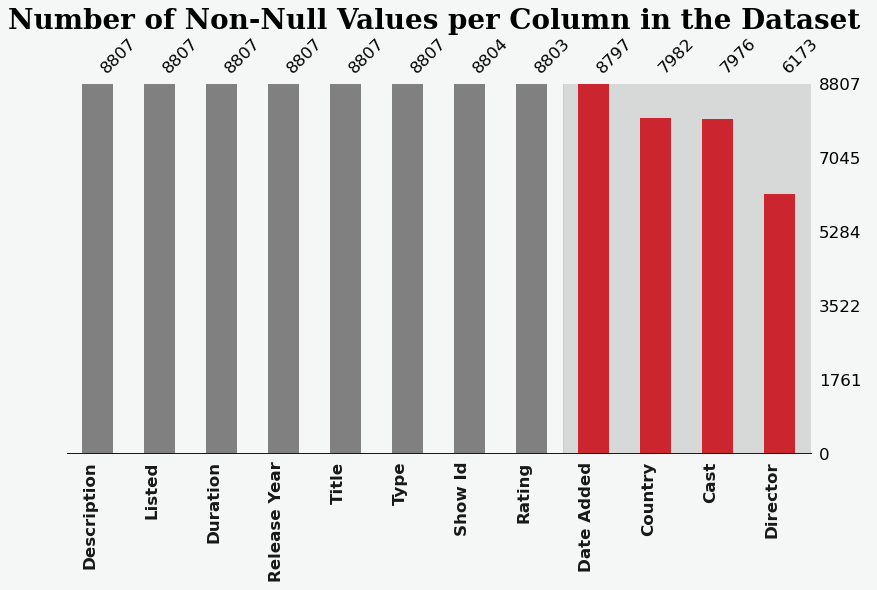

In [241]:
# fig 為 外面的容器， ax 為裡面的分析圖， ax 可以有很多個
fig, ax = plt.subplots(dpi=80, figsize=(12, 6))   # 設定圖形規格
# 設定圖形和畫布背景顏色為淺灰色
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

# 定義了一組顏色，前 8 個為灰色，後 4 個為紅色。
color = ['grey'] * 8 + ['#E50914'] * 4
# 使用 msno.bar 繪製遺漏值直條圖。 sort='descending' 缺失值越多放越後面
msno.bar(df, fontsize=15, color=color, sort='descending', ax=ax)

labels = [
    'Description', 'Listed', 'Duration', 'Release Year', 'Title', 'Type',
    'Show Id', 'Rating', 'Date Added', 'Country', 'Cast', 'Director'
]
ax.set_title('Number of Non-Null Values per Column in the Dataset ',
             fontdict={
                 'font': 'serif',
                 'color': 'black',
                 'weight': 'bold',
                 'size': 25
             })
ax.set_xticklabels(labels,
                   rotation=90,
                   fontsize=15,
                   fontweight='bold',
                   color='black',
                   alpha=0.9)
# 在圖上添加了一個垂直色塊
# 7.5 起始 x 座標、 12.5 結束 x 座標、起始 y 座標、結束 y 座標
ax.axvspan(7.5, 12.5, 0, 8807, color='grey', alpha=0.25)

ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

In [242]:
# 備份資料
df_orig = df.copy()

#### 填補遺漏值
* 填補方式
    * 1.director : 導演。導演名單有遺漏值。待會可以使用 "director_unknown" 來填補，代表未知演員
    * 2.cast : 演員名單有遺漏值。待會可以使用 "cast_unknown" 來填補，代表未知演員
    * 3.country : 發布國家。待會可以以最多發布的國家來填補
    * 4.date_added : 上架日期。以最多發布的日期來填補
    * 5.rating : 年齡分級。可以以最多的年齡分級來填補
    * 6.duration : 播放時間。可以以最多的撥放時間填補

In [243]:
df['director'] = df['director'].fillna('DirectorUnknown')
df['cast'] = df['cast'].fillna('CastUnknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


現在可以看到所有欄位空值都被填補起來了

### 開始探索數據

#### 先來分析數據欄位給予的資訊
* 1. 時間欄位如第一列觀察值 date_added 為 September 25, 2021，是年月日混和，為了方便分析時間相資料，所以待會會個別將 **年分** 與 **月份** 提取出來
* 2. 而例如導演、演員之類的，我們可以分析導演與演員比較愛拍攝甚麼等級的影片
* 3. 或是從國家來做一張地圖了解不同國家發布數量比較
* 4. Netflix 代表顏色為 黑、紅與白色，所以以下分析的顏色配色將以這三顏色為主

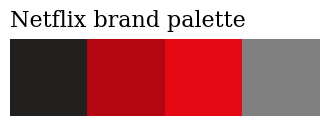

In [244]:
# Netflix 配色
colors = ['#221f1f', '#b20710', '#e50914', 'grey']
# palplot 函數顯示了這四種顏色的示例
sns.palplot(colors, size=1)
plt.title("Netflix brand palette ",
          loc='left',          # 標題的位置 靠左
          fontfamily='Serif',
          fontsize=16,
          y=1.05)

plt.axis('off')

plt.show()

#### 繪製發布類型數量圖， TvShow 與 Movies

In [245]:
# 計算每種類型的數量
type_counts = df['type'].value_counts()

# 計算總記錄數
total_records = len(df)

# 計算每種類型的百分比
movie_percentage = int((type_counts['Movie'] / total_records) * 100)
tv_show_percentage = int((type_counts['TV Show'] / total_records) * 100)

# 顯示結果
print(f"Movie 百分比: {movie_percentage}%")
print(f"TV Show 百分比: {tv_show_percentage}%")

Movie 百分比: 69%
TV Show 百分比: 30%


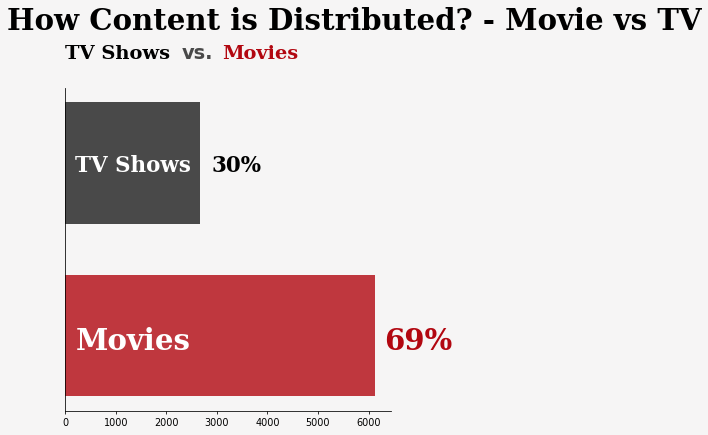

In [246]:
# X 為 type 計算不同類別的資料
x = df['type'].value_counts()

# 繪製 TV Shows 橫向長條圖
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.values[1], height = 0.7, color = 'black', alpha = 0.7)
plt.text(200,0.95, 'TV Shows', fontdict={'font': 'Serif','weight':'bold','size': 22,'style':'normal', 'color':'white'})
plt.text(2900,0.95, f'{tv_show_percentage}%',fontdict={'font':'Serif', 'weight':'bold','size':22,'color':'black'})

# 繪製 Movies 橫向長條圖
ax.barh([0], x.values[0], height = 0.7, color = '#b20710', alpha = 0.8)
plt.text(200,-0.08, 'Movies',fontdict={'font': 'Serif','weight':'bold','size': 30,'style':'normal', 'color':'white'})
plt.text(6300,-0.08, f'{movie_percentage}%',fontdict={'font':'Serif','weight':'bold' ,'size':30,'color':'#b20710'})

# 設置圖和子圖的背景顏色
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150,1.77, 'How Content is Distributed? - Movie vs TV' ,{'font': 'Serif', 'size': 30,'weight':'bold', 'color':'black'})
plt.text(0,1.6, 'TV Shows', fontdict={'font': 'Serif','weight':'bold','size': 20, 'color':'black'})
plt.text(2300,1.6, 'vs.', fontdict={'color':'black' , 'size':20, 'weight': 'bold'}, alpha=0.7)
plt.text(3100,1.6, 'Movies', fontdict={'font': 'Serif','weight':'bold', 'size': 20,'color':'#b20710'})

ax.axes.get_yaxis().set_visible(False)  # 關閉 Y 軸 刻度標籤
ax.spines['left'].set_visible(True)     # 保留 Y 軸的線
ax.spines['right'].set_visible(False)   # 隱藏右側 Y 軸的線
ax.spines['top'].set_visible(False)     # 隱藏頂端 X 軸的線

再發布的節目中，電影比較多，而 Tv shows 比較少 

#### 分析發行的節目，
> 
* 1.以年紀分類 : 分成 兒童、青少年 與 成年人
* 2.參考美國電影分級制度 : https://zh.wikipedia.org/zh-tw/%E7%BE%8E%E5%9B%BD%E7%94%B5%E8%A7%86%E5%88%86%E7%BA%A7%E5%88%B6%E5%BA%A6
* 3. 分級方式
    * 兒童(kids) : TV-Y、TV-Y7、TV-G、PG、TV-PG、TV-Y7-FV、G
    * 青少年(Teens) : PG-13、TV-14、
    * 成年人(Adults) : TV-MA、NC-17、NR、UR

In [247]:
## 建立等級分類
rating = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'R'     : 'Adults',
            'TV-MA' : 'Adults',
            'NC-17' : 'Adults',
            'NR': 'Adults',
            'UR': 'Adults',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'} 

In [248]:
## 建立新的欄位來裝取新的等級分類
df['age_rating'] = df['rating'].replace(to_replace = rating)
## age_rating 計算每個等級分類的出現次數
age_ratings = df['age_rating'].value_counts()
df['age_rating']

0        Teens
1       Adults
2       Adults
3       Adults
4       Adults
         ...  
8802    Adults
8803      Kids
8804    Adults
8805      Kids
8806     Teens
Name: age_rating, Length: 8807, dtype: object

繪製等級分類 板塊圖

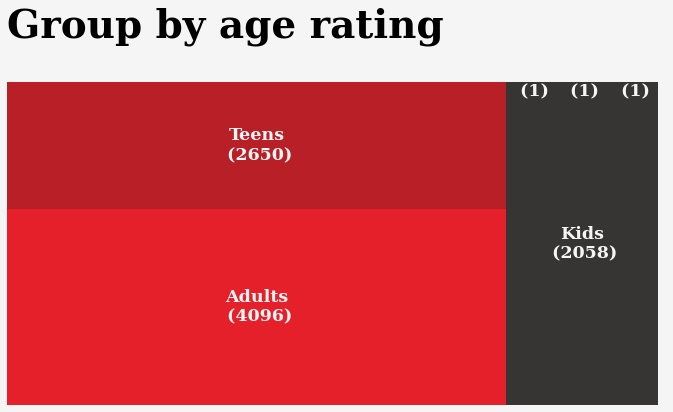

In [250]:
# 這一段創建一個 label 列表 idx 為等級類別、val 表示出現次數
# 透過 .items() 將  str(idx) + '\n ('+ str(val)')'  產生的字組合起來
labels = [str(idx) + "\n (" + str(val) + ")" for idx, val in age_ratings.items()]

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# 使用 squarify 建立板塊圖
squarify.plot(sizes= age_ratings.values, label = labels,  # sizes 為指定 age_ratings 個分級出現次數
              color = ['#e50914', '#b20710','#221f1f'],   # 配色
              ax = ax, text_kwargs = {'font':'serif', 'fontsize':'18', 'color': '#f6f5f5', 'weight':'bold'},
              alpha = 0.9)

ax.text(0, 114,'Group by age rating',fontdict={'font':'serif', 'fontsize':40, 'color':'black','weight':'bold'})
ax.text(0, 114,'Kids | Teens | Adults',fontdict={'font':'serif', 'fontsize':40, 'color':'black','weight':'bold'})
ax.axis('off')
fig.show()